In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm

## Aproach
1. First cluster (Cusine,Demographics) data
2. Replace cluster lables in (Cusine,zip_code) data
3. Train model to predict label for (cusine) 

In [2]:
demographics=pd.read_csv("./arizon_demographics.csv")

In [3]:
demographics_columns=['zipcode','total_pop','occupied_housing_units','white_pop','afam_pop','amindian_pop','hawaiian_pop','other_race','male','female','median_income','median_age','under_18','above_18','PCT0050002','PCT0050003','PCT0050004','PCT0050005','PCT0050006','PCT0050007','PCT0050008','PCT0050009','PCT0050010','PCT0050011','PCT0050012','PCT0050013','PCT0050014','PCT0050015','PCT0050016','PCT0050017','PCT0050018','PCT0050019','PCT0050020']

In [4]:
demo_data=demographics[demographics_columns]

In [5]:
demo_data=demo_data.dropna()
demo_data['zipcode']=demo_data['zipcode'].astype(int)

## Walk Score

In [6]:
with open('./phoenix_zipcode_scores.json') as f:
    data = json.load(f)
    walkscores=[]
    walkscore_dict={}
    count=0
    for e in data:
        walkscore_dict[e['zipcode']]=e['walk_score']
    for _,row in demo_data.iterrows():
        zipcode=str(int(row['zipcode']))
        if zipcode in walkscore_dict:
            walkscores.append(walkscore_dict[zipcode])
        else:
            count+=1
            walkscores.append(np.average(list(walkscore_dict.values())))
    demo_data['walkscore']=walkscores
print(count)

84


In [7]:
demo_dict={}
for _,row in demo_data.iterrows():
    zipcode=str(int(row['zipcode']))
    demo_dict[zipcode]=row

## Supported Cuisines
Mexican,American (Traditional),Pizza,American (New),Burgers,Italian,Chinese,Salad,Sports Bars,Seafood,Japanese,Barbeque,Mediterranean,Sushi Bars,Asian Fusion,Steakhouses,Greek,Tex-Mex,Thai,Vietnamese,Indian,Middle Eastern,Southern,Latin American,Hawaiian,Korean,French,Caribbean,Pakistani,Ramen,New Mexican Cuisine,Modern European,Spanish,African,Cantonese,Persian/Iranian,Filipino,Cuban,Mongolian,Lebanese,Polish,Taiwanese,German,Turkish,Ethiopian,Brazilian,Afghan,

1. Total of 40 cuisines as of now.
2. Average of 4 cusines per restuarant. 

In [35]:
cuisines=['Mexican','American (Traditional)','Pizza','American (New)','Burgers','Italian','Chinese','Salad','Sports Bars','Seafood','Japanese','Barbeque','Mediterranean','Sushi Bars','Asian Fusion','Steakhouses','Greek','Tex-Mex','Thai','Vietnamese','Indian','Middle Eastern','Southern','Latin American','Hawaiian','Korean','French','Caribbean','Pakistani','Ramen','New Mexican Cuisine','Modern European','Spanish','African','Cantonese','Persian/Iranian','Filipino','Cuban','Mongolian','Lebanese','Polish','Taiwanese','German','Turkish','Ethiopian','Brazilian','Afghan']

In [38]:
len(cuisines)

31

In [37]:
cuisines=['Mexican','American (Traditional)','American (New)','Burgers','Italian','Chinese','Salad','Sports Bars','Seafood','Japanese','Mediterranean','Sushi Bars','Asian Fusion','Steakhouses','Greek','Thai','Vietnamese','Indian','Middle Eastern','Southern','Latin American','Hawaiian','Korean','French','Caribbean','Pakistani','New Mexican Cuisine','Spanish','African','Persian/Iranian','Mongolian']

In [9]:
arizona_restuarnts=pd.read_csv('../arizona_business_details.csv')

In [10]:
count=0
cols=['zipcode','business_id']+cuisines
data=pd.DataFrame(columns=cols)
for _,row in arizona_restuarnts.iterrows():
    categories=row['categories'].split(',')
    categories=[x.strip() for x in categories]
    categories=set(categories)
    cuisine_bin_vector=[0 for x in range(len(cuisines))]
    for i in range(len(cuisines)): 
        if cuisines[i] in categories:
            cuisine_bin_vector[i]=1
    data.loc[data.shape[0]+1]=[row['postal_code'],row['business_id']] + cuisine_bin_vector
data.head()

,zipcode,business_id,Mexican,American (Traditional),Pizza,American (New),Burgers,Italian,Chinese,Salad,...,Cuban,Mongolian,Lebanese,Polish,Taiwanese,German,Turkish,Ethiopian,Brazilian,Afghan
1,85323.0,8-NRKkPY1UiFXW20WXKiXg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,85007.0,_c3ixq9jYKxhLUB0czi0ug,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,85033.0,3ByGQOVgds2YEu6kzl-XEQ,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85033.0,CeuTRtwsq6w5rztGOyNMPg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,85033.0,AcGRSWCpb7YB95MTsHlGEw,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
clean_data=data.dropna()

## Creating data

In [13]:
final_columns=list(clean_data.columns)+list(demo_data.columns)
print(len(list(clean_data.columns)))
print(len(list(list(demo_data.columns))))
final_data=pd.DataFrame(columns=final_columns)
for _,row in clean_data.iterrows():
    newrow=list(row)
    zipcode=str(int(row['zipcode']))
    if zipcode in demo_dict:
        newrow+=list(demo_dict[zipcode])
        final_data.loc[final_data.shape[0]+1]=newrow

49
34


In [15]:
final_data=final_data.T.drop_duplicates().T

In [5]:
final_data['zipcode']=final_data['zipcode'].astype(int)
final_temp=final_data.copy()
final_temp=final_temp.drop(['business_id'],axis=1)
final_temp.shape[0]

10978

In [427]:
final_data.to_csv("arizona_business_demographic.csv")

In [3]:
final_data=pd.read_csv("arizona_business_demographic.csv")

## Clustering using k-means

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(final_temp)
labels=kmeans.labels_
final_data['cluster']=labels

31
31
31
31
31


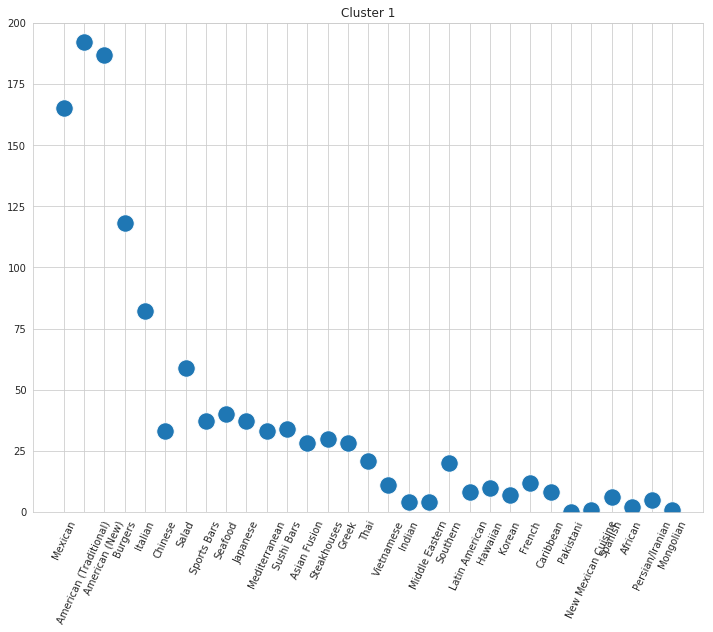

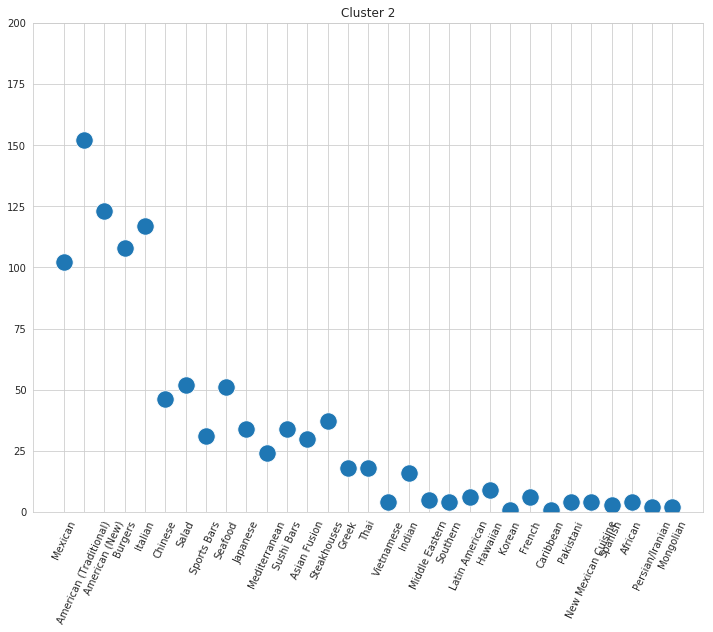

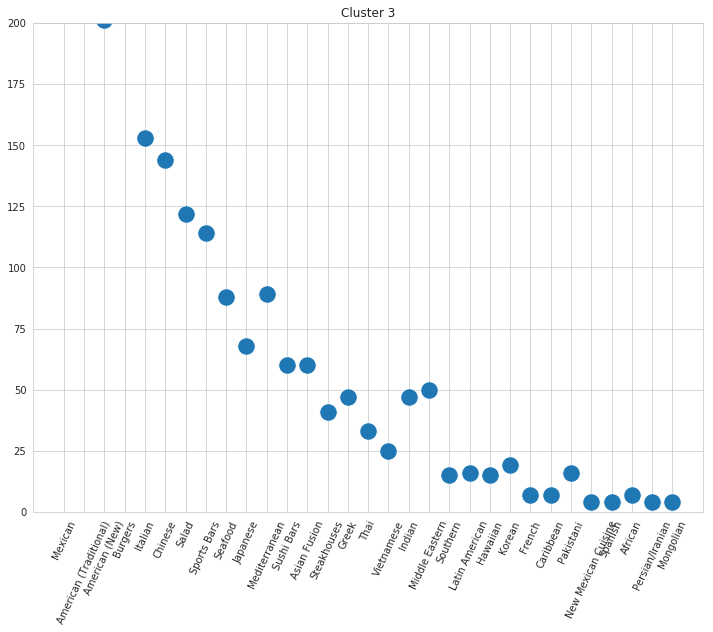

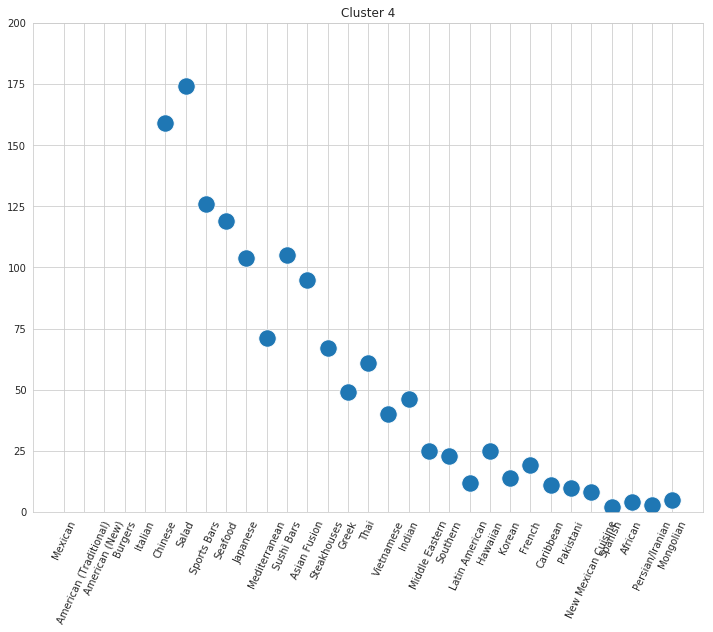

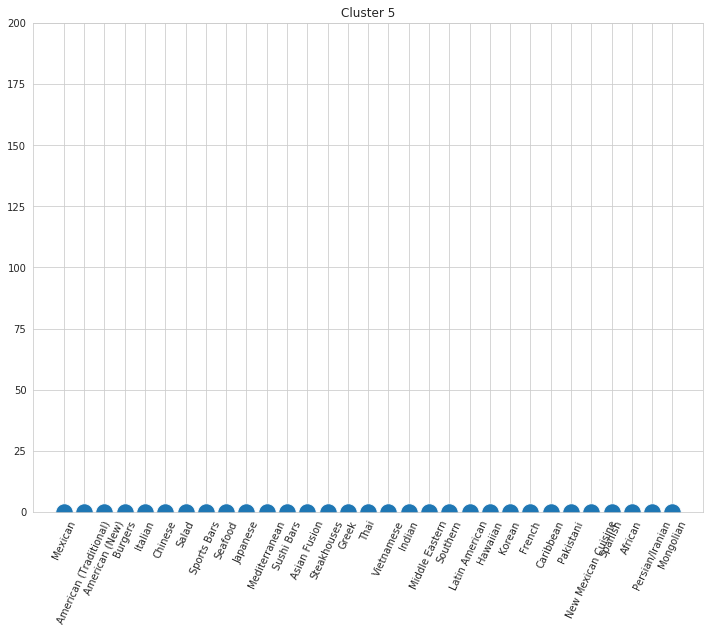

In [34]:
cluster_df=pd.DataFrame(columns=['cluster','cuisine','freq'])
import seaborn as sns
sns.set_style("whitegrid")
colors=['r','b','g','y','v']
for cluster in np.arange(1,6):
    summary=[]
    for x in cuisines:
        summary.append(final_data[final_data.cluster==cluster][x].sum())
        cluster_df.loc[len(cluster_df)+1]=[cluster,x,final_data[final_data.cluster==cluster][x].sum()]
    print(len(summary))
    f, ax = plt.subplots(figsize=(12, 9))
    g=sns.scatterplot(cuisines,summary,s=300)
    g.set_title("Cluster "+str(cluster))
    g.set(ylim=(0, 200))
    g.set_xticklabels(rotation=65,labels=cuisines)
    g.get_figure().savefig("output"+str(cluster)+".png")


In [24]:
cluster_df1.tail()

,cluster,cuisine,freq
120,4,New Mexican Cuisine,8
121,4,Spanish,2
122,4,African,4
123,4,Persian/Iranian,3
124,4,Mongolian,5


In [23]:
cluster_df1=cluster_df[cluster_df.cluster!=5]

In [21]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

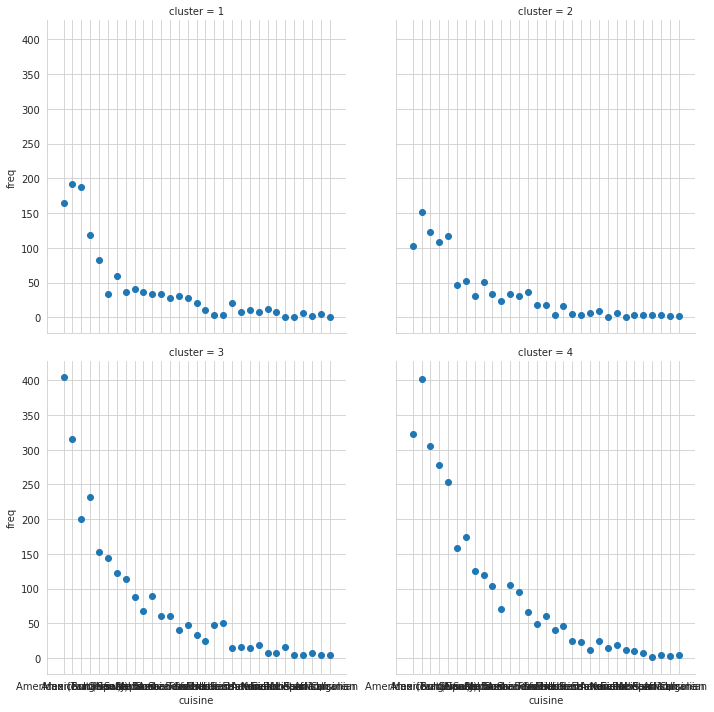

In [31]:

g = sns.FacetGrid(cluster_df1, col="cluster", col_wrap=2, height=5)
#g = g.scatterplot(cluster_df1, "cuisine", "freq")
g=g.map(plt.scatter, "cuisine", "freq")

In [26]:
xcols=['Mexican', 'American (Traditional)', 'Pizza',
       'American (New)', 'Burgers', 'Italian', 'Chinese', 'Salad',
       'Sports Bars', 'Seafood', 'Japanese', 'Barbeque', 'Mediterranean',
       'Sushi Bars', 'Asian Fusion', 'Steakhouses', 'Greek', 'Tex-Mex', 'Thai',
       'Vietnamese', 'Indian', 'Middle Eastern', 'Southern', 'Latin American',
       'Hawaiian', 'Korean', 'French', 'Caribbean', 'Pakistani', 'Ramen',
       'New Mexican Cuisine', 'Modern European', 'Spanish', 'African',
       'Cantonese', 'Persian/Iranian', 'Filipino', 'Cuban', 'Mongolian',
       'Lebanese', 'Polish', 'Taiwanese', 'German', 'Turkish', 'Ethiopian',
       'Brazilian', 'Afghan']


In [27]:
def zeroOneLoss(testy,predy):
    count=0
    for t,p in zip(testy,predy):
        if t!=p:
            count+=1
    total=len(testy)
    total=(total-count)/total
    total=total*100
    return total
    

In [28]:
len(final_data)

10978

In [29]:
trainx=final_data[xcols].loc[1:10878,]
trainy=final_data['cluster'].loc[1:10878,]
testx=final_data[xcols].loc[10878:,]
testy=final_data['cluster'].loc[10878:,]

In [30]:
trainx.columns

Index(['Mexican', 'American (Traditional)', 'Pizza', 'American (New)',
       'Burgers', 'Italian', 'Chinese', 'Salad', 'Sports Bars', 'Seafood',
       'Japanese', 'Barbeque', 'Mediterranean', 'Sushi Bars', 'Asian Fusion',
       'Steakhouses', 'Greek', 'Tex-Mex', 'Thai', 'Vietnamese', 'Indian',
       'Middle Eastern', 'Southern', 'Latin American', 'Hawaiian', 'Korean',
       'French', 'Caribbean', 'Pakistani', 'Ramen', 'New Mexican Cuisine',
       'Modern European', 'Spanish', 'African', 'Cantonese', 'Persian/Iranian',
       'Filipino', 'Cuban', 'Mongolian', 'Lebanese', 'Polish', 'Taiwanese',
       'German', 'Turkish', 'Ethiopian', 'Brazilian', 'Afghan'],
      dtype='object')

## Predict the cluster

In [31]:
from sklearn import svm
clf = svm.SVC()
clf.fit(trainx,trainy) 
predicted_y=clf.predict(testx)
print(zeroOneLoss(testy,predicted_y))

34.65346534653465


In [449]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0)
pred_y=clf.fit(trainx,trainy).predict(testx)
print(zeroOneLoss(testy,pred_y))

35.64356435643564


In [519]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf,trainx,trainy, cv=10)

array([0.34097159, 0.34463795, 0.34618916, 0.33915441, 0.34191176,
       0.32290708, 0.34162063, 0.34254144, 0.33609576, 0.34069982])

In [520]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(trainx,trainy)
ypred=clf.predict(testx)
print(zeroOneLoss(testy,ypred))

37.62376237623762


In [521]:
final_data[xcols+['zipcode','cluster']][final_data.cluster==1].head()

,Mexican,American (Traditional),Pizza,American (New),Burgers,Italian,Chinese,Salad,Sports Bars,Seafood,...,Polish,Taiwanese,German,Turkish,Ethiopian,Brazilian,Afghan,zipcode,zipcode,cluster
11,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,85258.0,85258.0,1
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,85338.0,85338.0,1
16,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,85044.0,85044.0,1
22,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,85224.0,85224.0,1
27,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,85286.0,85286.0,1


In [522]:
similarity_scores=np.zeros(shape=(cluster_data.shape[0],2))

In [550]:
input_cuisine=list(testx[xcols].iloc[10])

In [554]:
def computeSimilarity(a,b):
    if norm(b)==0 or norm(a)==0:
        return 0
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
cluster=1
cluster_data=final_data[xcols+['zipcode','cluster']][final_data.cluster==cluster]
similarity_scores=pd.DataFrame(columns=['similarity','zipcode'])
for _,restaurant in cluster_data.iterrows():
    cur_cuisine_vector=list(restaurant[xcols])
    similarity_scores.loc[len(similarity_scores)+1]=[computeSimilarity(cur_cuisine_vector,input_cuisine),str(int(restaurant['zipcode']))]
similarity_scores['similarity']=similarity_scores['similarity'].astype('float')
largest=similarity_scores.nlargest(10,'similarity')

In [568]:
def giveMeTop10Zips(input_cuisine,cluster):
    cluster_data=final_data[xcols+['zipcode','cluster']][final_data.cluster==cluster]
    similarity_scores=pd.DataFrame(columns=['similarity','zipcode'])
    for _,restaurant in cluster_data.iterrows():
        cur_cuisine_vector=list(restaurant[xcols])
        similarity_scores.loc[len(similarity_scores)+1]=[computeSimilarity(cur_cuisine_vector,input_cuisine),str(int(restaurant['zipcode']))]
    similarity_scores['similarity']=similarity_scores['similarity'].astype('float')
    largest=similarity_scores.nlargest(10,'similarity')
    return largest

In [589]:
count=0
test_x=final_data[xcols].loc[10878:,]
test_y=final_data['zipcode'].loc[10878:,]
tempx=test_x.head()
tempy=test_y.head()
test_x=tempx
test_y=tempy
pred_y=clf.predict(testx)

In [590]:
for i in range(test_x.shape[0]):
    input_cuisine=list(test_x.iloc[i][xcols])
    cluster=pred_y[i]
    cur_largest=giveMeTop10Zips(input_cuisine,cluster)
    correct_zipcode=str(int(test_y.iloc[i]))
    if correct_zipcode in cur_largest['zipcode']:
        count+=1
print(count)

0
